# Comparison of models for MORE & LESS (Inversion and No inversion) frames. Excluded slow RT trials

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "More", lab2 = "Less",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [More - Less] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(title, fontsize=25)
    sns.despine()

# Inversion of "Value" in LESS frame
--------------------------------------------------------------------


# Load parameters for both conditions

In [3]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
#Dislike_sufix = '_Dislike_NoBin_Dislike_NUTS_31'
glam_full_like_estimates = np.load('results/estimates/glam_PF2019_full_individual_More_NoBin_excludedTrial_Gamma-11_NUTS_32.npy')   

# Load params from LIKE hierarchical model
#Like_sufix = '_Like_NoBin_NUTS_31'
glam_full_dislike_estimates = np.load('results/estimates/glam_PF2019_full_individual_Less_Inv_NoBin_excludedTrial_Gamma-11_NUTS_32.npy')   

In [4]:
len(glam_full_like_estimates)

32

## Parameters Like

In [5]:
#params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_dislike= pd.DataFrame.from_dict(glam_full_dislike_estimates[0])
params_part_like  = pd.DataFrame(glam_full_like_estimates[0])

for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

In [6]:
params_part_dislike

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000050,0.71,216.76,0.008308,0.07,0.0
1,1.0,0.05,0.000014,0.50,430.13,0.005996,0.15,0.0
2,1.0,0.05,0.000034,0.10,179.16,0.006028,0.08,0.0
3,1.0,0.05,0.000021,0.55,485.93,0.009992,0.12,0.0
4,1.0,0.05,0.000031,0.11,190.33,0.005490,0.06,0.0
5,1.0,0.05,0.000052,-0.52,168.21,0.007056,0.08,0.0
6,1.0,0.05,0.000029,0.20,242.06,0.007130,0.11,0.0
7,1.0,0.05,0.000052,-0.39,107.23,0.006266,0.07,0.0
8,1.0,0.05,0.000106,0.79,49.08,0.005228,0.02,0.0
9,1.0,0.05,0.000054,0.31,115.47,0.007127,0.13,0.0


In [7]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000041,0.80,198.29,0.009338,1.80,0.0
1,1.0,0.05,0.000012,0.88,367.84,0.004970,0.29,0.0
2,1.0,0.05,0.000030,0.45,210.70,0.007683,0.13,0.0
3,1.0,0.05,0.000024,0.94,370.45,0.009844,0.26,0.0
4,1.0,0.05,0.000034,0.76,156.19,0.005216,0.12,0.0
5,1.0,0.05,0.000046,0.69,119.54,0.007503,0.09,0.0
6,1.0,0.05,0.000025,0.87,419.20,0.010721,0.14,0.0
7,1.0,0.05,0.000044,-0.95,166.28,0.007235,0.30,0.0
8,1.0,0.05,0.000095,0.99,78.09,0.006916,0.02,0.0
9,1.0,0.05,0.000042,-0.25,161.82,0.008795,0.27,0.0


In [8]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [9]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [10]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Most - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Most - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Most - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Most - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Most - Less] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Most - Less] =  23.18656249999995 ; p-value =0.18890012944970086
Gamma: [Most - Less] =  0.21874999999999994 ; p-value =0.007617450728964958
Tau: [Most - Less] =  0.27093749999999983 ; p-value =0.06187819305612498
V: [Most - Less] =  -1.7187499999999977e-06 ; p-value =0.2968204791429264
S: [Most - Less] =  0.000751250000000001 ; p-value =0.010828073677117503


## Violin plot for the comparison of the parameters

In [11]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
# Add asterisk
def add_star1(RT_like, RT_dislike):
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

In [12]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
  #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

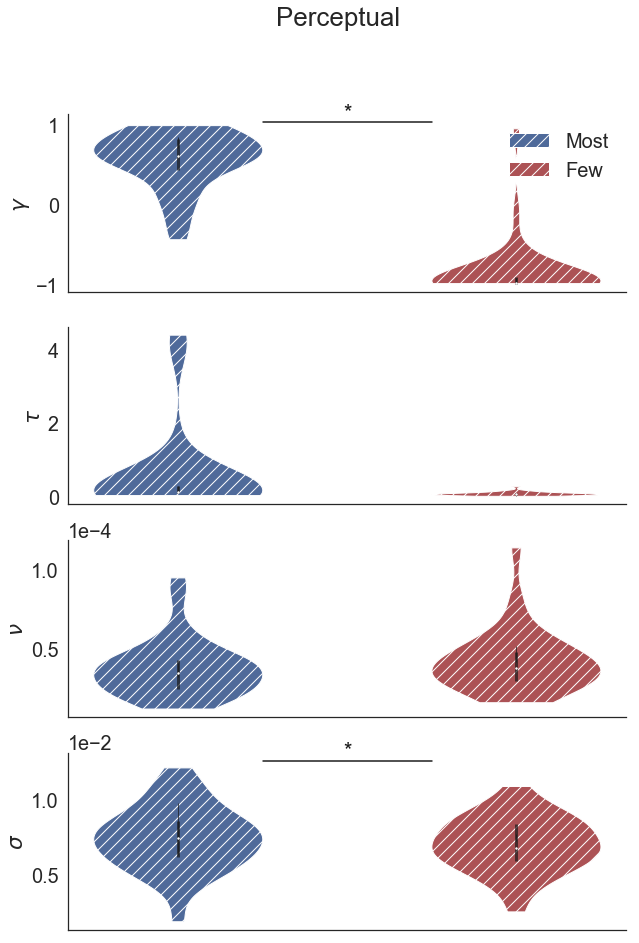

In [40]:
f = plt.figure(figsize=(10,15))
sns.set(style='white', font_scale=1.8)

#my_pal = {"r","b","b","y","r"}
my_pal = {0: "b", 1: "r"}
colr_dict = { 0:'#4F6A9A', 1:'#AC5255' }

plt.subplot(411)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma.values,
            params_part_dislike.gamma.values]
add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1])
#plt.xticks([1 ,2], ['Most', 'Few'])
plt.ylabel(r'$\gamma$')
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

# PLot legend
patch1 = mpatches.Patch(facecolor=colr_dict[0],hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor=colr_dict[1],hatch=r'//', label='Few')
leg = plt.legend(handles=[patch1,patch2],fontsize=20,loc = "upper right")
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

# # Add asterisk
# x1, x2 = 0, 1   
# y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
# y, h, col = y_max + y_max/50, y_max/50, 'k'
# plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR tau
plt.subplot(412)
all_arr1 = [params_part_like.tau.values,
            params_part_dislike.tau.values]
add_violin(all_arr1)
#plt.xticks([1 ,2], ['Most', 'Few'])
plt.ylabel(r'$\tau$')
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

# FOR v
plt.subplot(413)
all_arr1 = [params_part_like.v.values,
            params_part_dislike.v.values]
add_violin(all_arr1)
#plt.xticks([1 ,2], ['Most', 'Few'])
plt.ylabel(r'$\nu$')
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# FOR s
plt.subplot(414)
all_arr1 = [params_part_like.s.values,
            params_part_dislike.s.values]
add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1])
#plt.xticks([1 ,2], ['Most', 'Few'])
plt.ylabel(r'$\sigma$')
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))



plt.suptitle('Perceptual')



sns.despine()

Text(0.5, 0.0112736, '*')

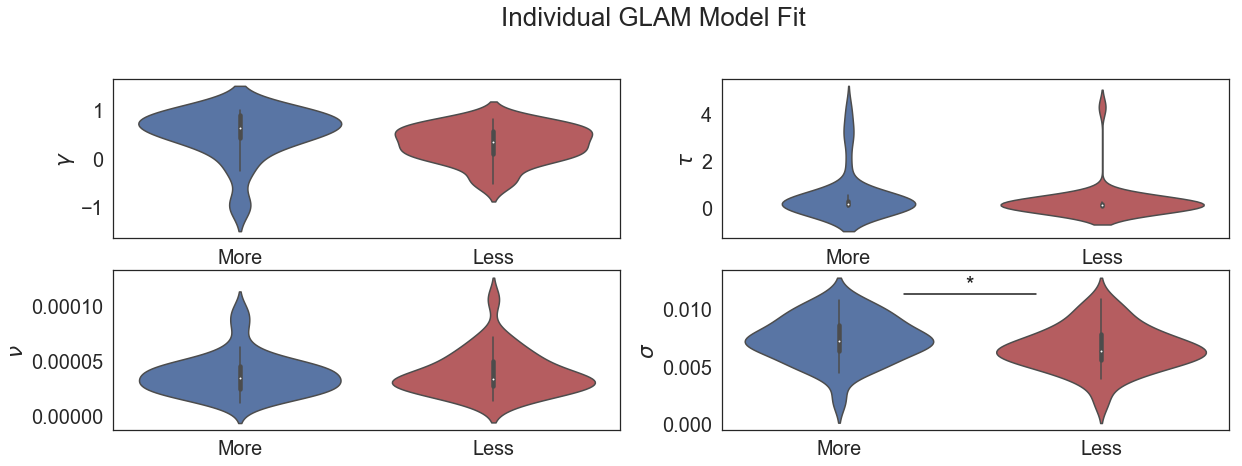

In [14]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('Individual GLAM Model Fit')

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

### FOR SNR
##all_arr = [params_part_like.SNR,
##          params_part_dislike.SNR]
##bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
##plt.xticks([0, 1,], ['Like', 'Dislike'])

## Add asterisk
#x1, x2 = 0, 1   
#y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
#y, h, col = y_max + y_max/50, y_max/50, 'k'
#plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0 ,1], ['More', 'Less'])

# # Add asterisk
# x1, x2 = 0, 1   
# y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
# y, h, col = y_max + y_max/50, y_max/50, 'k'
# plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['More', 'Less'])



# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['More', 'Less'])


# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['More', 'Less'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.s.max(), params_part_dislike.s.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

MeanL = 0.51; MeanD = 0.29; [More - Less] =  0.22; t =  2.85 ; p-value =0.01
MeanL = 0.53; MeanD = 0.25; [More - Less] =  0.27; t =  1.94 ; p-value =0.06
MeanL = 0.0; MeanD = 0.0; [More - Less] =  -0.0; t =  -1.06 ; p-value =0.3
MeanL = 0.01; MeanD = 0.01; [More - Less] =  0.0; t =  2.71 ; p-value =0.01


(0.004, 0.012)

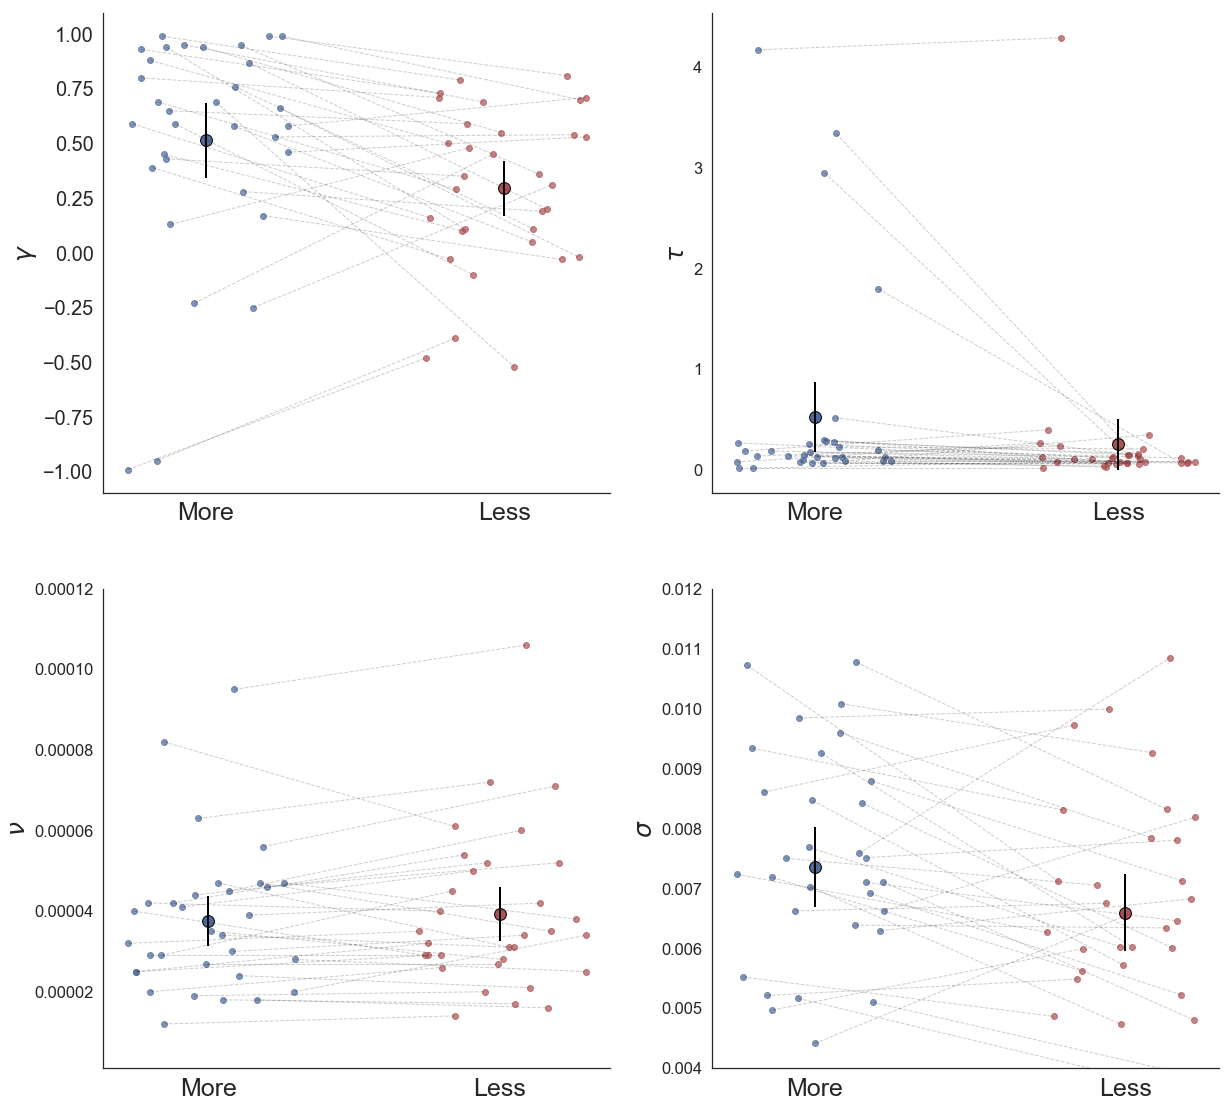

In [15]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255',"More",  "Less",title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255',"More",  "Less",title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255',"More",  "Less",title = r'$\nu$')
plt.ylim(0.000001, 0.00012)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255',"More",  "Less",title = '$\sigma$')
plt.ylim(0.004,0.012 )

# No Inversion of "Value" in LESS frame
--------------------------------------------------------------------


# Load parameters for both conditions

In [16]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
#Dislike_sufix = '_Dislike_NoBin_Dislike_NUTS_31'
glam_full_like_estimates = np.load('results/estimates/glam_PF2019_full_individual_More_NoBin_Gamma-11_NUTS_33.npy')   

# Load params from LIKE hierarchical model
#Like_sufix = '_Like_NoBin_NUTS_31'
glam_full_dislike_estimates = np.load('results/estimates/glam_PF2019_full_individual_Less_NoBin_Gamma-11_NUTS_33.npy')   

In [17]:
len(glam_full_like_estimates)

32

## Parameters Like

In [18]:
#params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_dislike= pd.DataFrame.from_dict(glam_full_dislike_estimates[0])
params_part_like  = pd.DataFrame(glam_full_like_estimates[0])

for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

In [19]:
params_part_dislike

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000052,-0.92,133.85,0.007718,0.01,0.0
1,1.0,0.05,0.000016,-0.99,322.12,0.006114,0.05,0.0
2,1.0,0.05,0.000034,-0.10,195.74,0.006339,0.14,0.0
3,1.0,0.05,0.000021,-0.99,435.35,0.008508,0.11,0.0
4,1.0,0.05,0.000031,-0.99,169.32,0.005410,0.06,0.0
5,1.0,0.05,0.000058,-0.70,107.39,0.005416,0.08,0.0
6,1.0,0.05,0.000030,-0.99,219.15,0.007774,0.09,0.0
7,1.0,0.05,0.000051,-0.99,129.52,0.006626,0.09,0.0
8,1.0,0.05,0.000114,-0.84,48.38,0.005459,0.00,0.0
9,1.0,0.05,0.000055,-0.99,160.39,0.009785,0.06,0.0


In [20]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000041,0.85,203.91,0.009766,0.28,0.0
1,1.0,0.05,0.000012,0.89,484.37,0.005238,0.29,0.0
2,1.0,0.05,0.000031,-0.09,300.85,0.007449,0.13,0.0
3,1.0,0.05,0.000022,0.98,462.96,0.010301,0.17,0.0
4,1.0,0.05,0.000031,0.68,173.23,0.005436,0.13,0.0
5,1.0,0.05,0.000043,0.63,152.61,0.007799,0.08,0.0
6,1.0,0.05,0.000025,0.82,404.11,0.011048,0.10,0.0
7,1.0,0.05,0.000052,-0.27,123.62,0.007531,0.06,0.0
8,1.0,0.05,0.000095,0.99,54.69,0.005685,0.02,0.0
9,1.0,0.05,0.000040,0.08,185.80,0.009549,0.32,0.0


In [21]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [22]:
## Merge both frames in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [23]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [More - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [More - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [More - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [More - Less] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [More - Less] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [More - Less] =  64.00125000000008 ; p-value =0.0010952848874250614
Gamma: [More - Less] =  1.4096874999999998 ; p-value =3.222445940177314e-16
Tau: [More - Less] =  0.5159374999999999 ; p-value =0.022645050887304157
V: [More - Less] =  -4.531249999999998e-06 ; p-value =0.03425061506266734
S: [More - Less] =  0.00041284375 ; p-value =0.14536610291302338


## Violin plot for the comparison of the parameters

([<matplotlib.axis.XTick at 0x7ffc40a93198>,
 <a list of 2 Text xticklabel objects>)

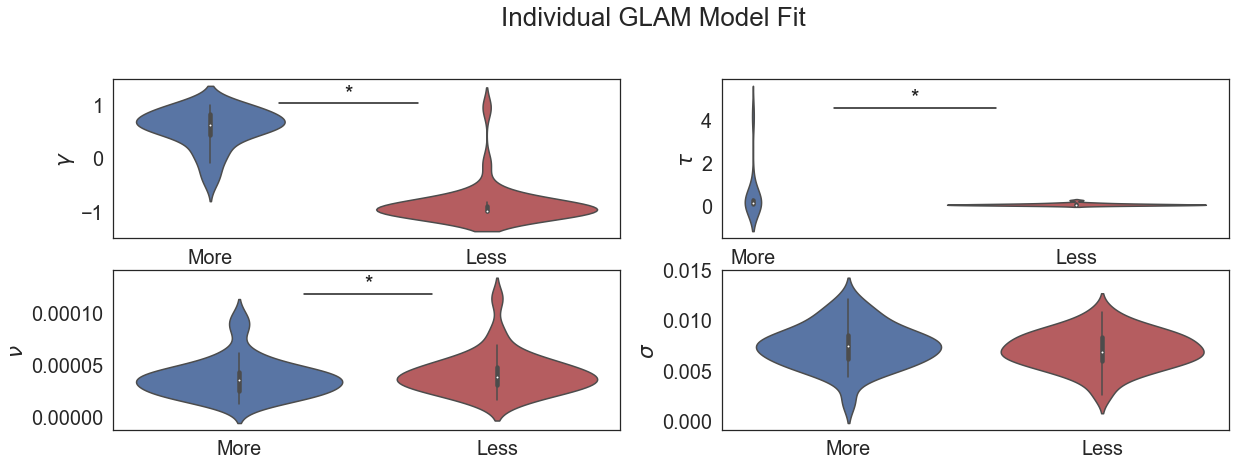

In [24]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('Individual GLAM Model Fit')

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

### FOR SNR
##all_arr = [params_part_like.SNR,
##          params_part_dislike.SNR]
##bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
##plt.xticks([0, 1,], ['Like', 'Dislike'])

## Add asterisk
#x1, x2 = 0, 1   
#y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
#y, h, col = y_max + y_max/50, y_max/50, 'k'
#plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0 ,1], ['More', 'Less'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['More', 'Less'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.tau.max(), params_part_dislike.tau.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['More', 'Less'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.v.max(), params_part_dislike.v.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['More', 'Less'])


MeanL = 0.56; MeanD = -0.85; [More - Less] =  1.41; t =  15.59 ; p-value =0.0
MeanL = 0.58; MeanD = 0.06; [More - Less] =  0.52; t =  2.4 ; p-value =0.02
MeanL = 0.0; MeanD = 0.0; [More - Less] =  -0.0; t =  -2.21 ; p-value =0.03
MeanL = 0.01; MeanD = 0.01; [More - Less] =  0.0; t =  1.49 ; p-value =0.15


(0.004, 0.012)

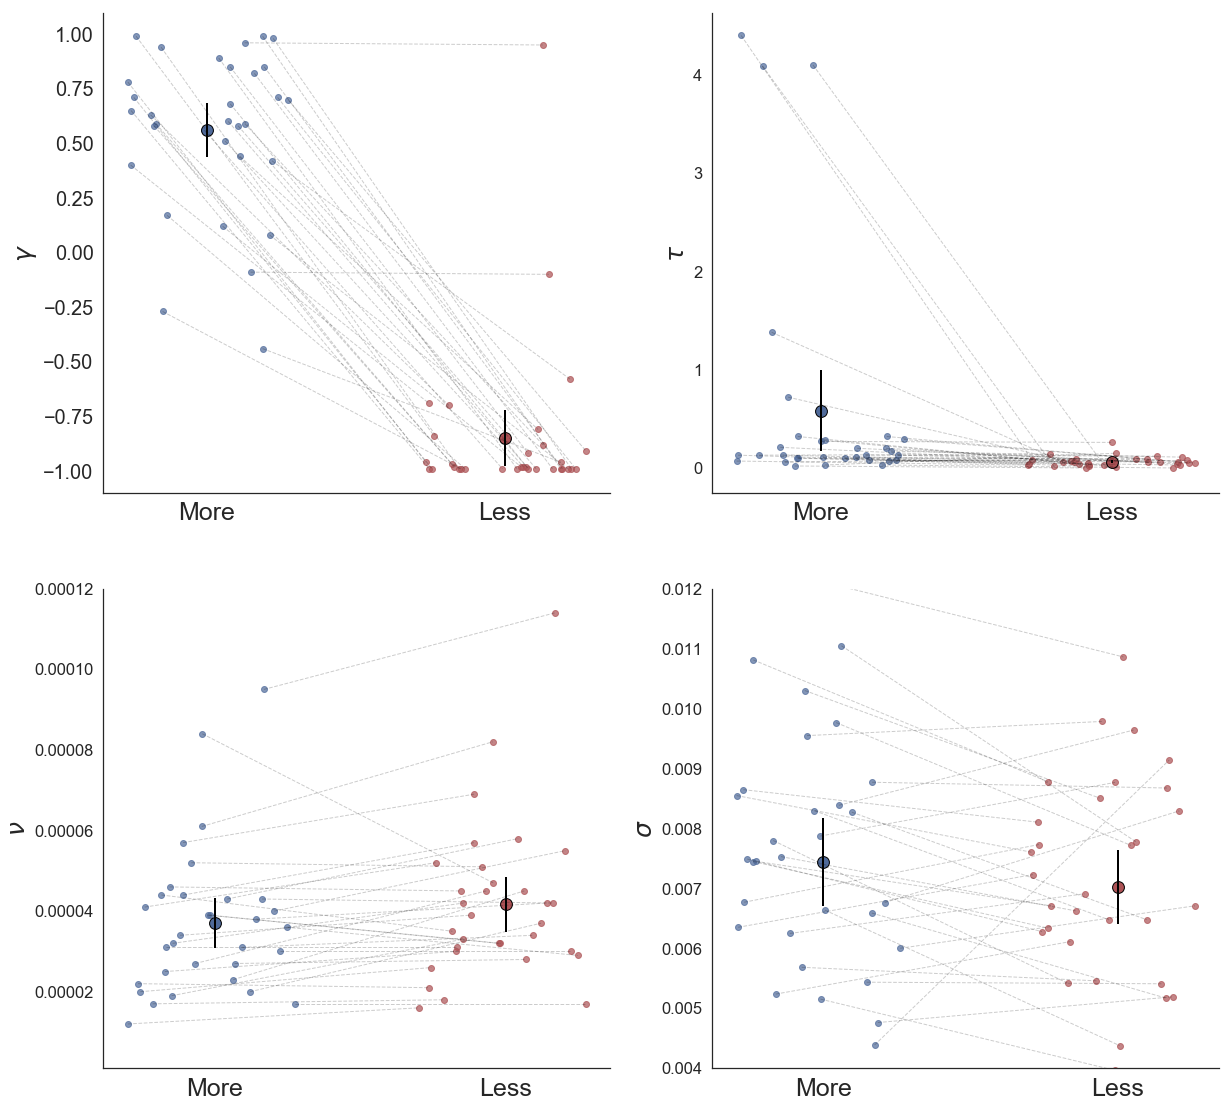

In [25]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255',"More",  "Less",title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255',"More",  "Less",title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255',"More",  "Less",title = r'$\nu$')
plt.ylim(0.000001, 0.00012)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255',"More",  "Less",title = '$\sigma$')
plt.ylim(0.004,0.012 )